# Lead Scoring Case Study
## Logistic Regression

#### Problem Statement:

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. 
For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 

Essentially, they want us to—

- help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
- build a model which assigns a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

### Step 1: Read and understand data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
# Importing libraris for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
leads = pd.read_csv('leads.csv')

#### Perform Basic Data Analysis - shape, sizes, nulls

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
pd.set_option('display.max_columns', 500)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Data Cleaning

In [9]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Checking dataframe has select in lower case
if 'Select' in leads.values:
    print('True')
else:
    print('False')

True


In [11]:
if 'select' in leads.values:
    print('True')
else:
    print('False')

False


In [12]:
# Replacing 'Select' with NaN as it means no option chosen by professionals 
#leads = leads.replace('Select',np.nan)
# Below command can check for both lower/upper case and replace select to nan

In [13]:
# Replacing 'Select' with NaN as it means no option chosen by professionals 
leads.replace('(?i)select',np.nan,regex=True, inplace=True)

In [14]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
round(100 * (leads.isnull().sum() / len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
# dropping columns with more than around 40% missing values 
# dropping columns with score variables like Tags, Asymmetrique Indexes and scores etc.
# dropping Lead Number as Prospect ID can help in differentiating the professionals

In [17]:
leads.drop(['Lead Number','How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
            'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
leads.shape

(9240, 27)

In [18]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [19]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [20]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
#checking unique values in Categorical columns 

In [22]:
features=['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [23]:
# for i in features:
#    print(100*(leads[i].value_counts(normalize=True)))
#    print(leads[i].nunique())
# Using below code to perfrm same steps in simpler and better observability method:

In [24]:
cols = leads.select_dtypes(include='object')
cols = cols.drop('Prospect ID', axis=1)
for col in cols.columns:
    print(f"Column: {col}\n ")
    percent = round(100. * (leads[col].value_counts() /(len(leads[col]) - leads[col].isnull().sum())),2)    
    print(percent)
    print("--------------------------------------------------------------")

Column: Lead Origin
 
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
--------------------------------------------------------------
Column: Lead Source
 
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
NC_EDM                0.01
WeLearn               0.01
welearnblog_Home      0.01
blog                  0.01
Name: Lead Source, dtype: float64
--------------------------------------------------------------
Column: Do Not Email
 
No     

In [25]:
#skewed columns-'Do Not Email','Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'
#columns where new category can be defined- 'Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity'

#### Dropping skewed columns

In [26]:
leads.drop(['Do Not Email','Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course','Search','Magazine',
            'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [27]:
leads.shape

(9240, 11)

#### Combining small caterories as others

In [28]:
100*(leads['Lead Origin'].value_counts(normalize=True))

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [29]:
leads['Lead Origin'].replace({'Lead Add Form':'others','Lead Import':'others','Quick Add Form':'others'},inplace=True) 

In [30]:
100*(leads['Lead Origin'].value_counts(normalize=True))

Landing Page Submission    52.878788
API                        38.744589
others                      8.376623
Name: Lead Origin, dtype: float64

In [31]:
100*(leads['Lead Source'].value_counts(normalize=True))

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Press_Release         0.021730
Social Media          0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
NC_EDM                0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
blog                  0.010865
Name: Lead Source, dtype: float64

In [32]:
leads['Lead Source'].replace({'Reference':'others','Welingak Website':'others','Referral Sites':'others',
                             'Facebook':'others','bing':'others','google':'others','Click2call':'others',
                              'Press_Release':'others','Social':'others','Media':'others','Live Chat':'others',
                             'WeLearn':'others','Pay per Click Ads':'others','youtubechannel':'others','blog':'others',
                              'welearnblog_Home':'others','NC_EDM':'others','testone':'others','Social Media':'others'},inplace=True) 

In [33]:
100*(leads['Lead Source'].value_counts(normalize=True))

Google            31.160365
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
others             9.604520
Name: Lead Source, dtype: float64

In [34]:
100*(leads['Last Activity'].value_counts(normalize=True))

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [35]:
leads['Last Activity'].replace({'Page Visited on Website':'others','Converted to Lead':'others','Email Bounced':'others',
                               'Email Link Clicked':'others','Form Submitted on Website':'others','Unreachable':'others',
                               'Unsubscribed':'others','Had a Phone Conversation':'others','Approached upfront':'others',
                               'View in browser link Clicked':'others','Email Marked Spam':'others','Email Received':'others',
                               'Resubscribed to emails':'others','Visited Booth in Tradeshow':'others'},inplace=True) 

In [36]:
100*(leads['Last Activity'].value_counts(normalize=True))

Email Opened               37.616285
SMS Sent                   30.042684
others                     21.692021
Olark Chat Conversation    10.649010
Name: Last Activity, dtype: float64

In [37]:
100*(leads['Specialization'].value_counts(normalize=True))

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [38]:
leads['Specialization'].replace({'Business Administration':'others','IT Projects Management':'others','Supply Chain Management':'others',
                               'Banking, Investment And Insurance':'others','Media and Advertising':'others','Travel and Tourism':'others',
                               'International Business':'others','Healthcare Management':'others','Hospitality Management':'others',
                               'E-COMMERCE':'others','Retail Management':'others','Rural and Agribusiness':'others',
                               'E-Business':'others','Services Excellence':'others'},inplace=True) 

In [39]:
100*(leads['Specialization'].value_counts(normalize=True))

others                       45.989761
Finance Management           16.655290
Human Resource Management    14.470990
Marketing Management         14.300341
Operations Management         8.583618
Name: Specialization, dtype: float64

In [40]:
100*(leads['Last Notable Activity'].value_counts(normalize=True))

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Email Received                   0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Approached upfront               0.010823
Resubscribed to emails           0.010823
Name: Last Notable Activity, dtype: float64

In [41]:
leads['Last Notable Activity'].replace({'Page Visited on Website':'others','Olark Chat Conversation':'others','Email Link Clicked':'others',
                               'Email Bounced':'others','Unsubscribed':'others','Unreachable':'others',
                               'Had a Phone Conversation':'others','Email Marked Spam':'others','Email Received':'others',
                               'Resubscribed to emails':'others','Form Submitted on Website':'others','Form Submitted on Website':'others',
                               'View in browser link Clicked':'others','Approached upfront':'others'},inplace=True) 

In [42]:
100*(leads['Last Notable Activity'].value_counts(normalize=True))

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
others           9.025974
Name: Last Notable Activity, dtype: float64

In [43]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,others,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,others,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,others,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,others,NaN,No,Modified


#### Imputing missing values for column with less mising percentages.

In [44]:
# checking missng values again
# catergorical column with mode and numerical column with mean or mode depending on presence of outliers

In [45]:
round(100 * (leads.isnull().sum() / len(leads.index)),2)

Prospect ID                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [46]:
# imputing columns with less missing values (<2%)

In [47]:
leads['Lead Source'].mode()

0    Google
dtype: object

In [48]:
leads['Lead Source'].fillna("Google", inplace = True)

In [49]:
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [50]:
#imputing with median=3
leads['TotalVisits'].fillna(3.0, inplace = True)

In [51]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [52]:
#imputing with median=2
leads['Page Views Per Visit'].fillna(2.0, inplace = True)

In [53]:
leads['Last Activity'].mode()

0    Email Opened
dtype: object

In [54]:
leads['Last Activity'].fillna("Email Opened", inplace = True)

#### Replace nan with 'missing' for Specializiaton

In [55]:
# Specialization has high missing percentage >36%

In [56]:
leads.Specialization.fillna("missing", inplace = True)

In [57]:
100*(leads['Specialization'].value_counts(normalize=True))

missing                      36.580087
others                       29.166667
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Operations Management         5.443723
Name: Specialization, dtype: float64

In [58]:
round(100 * (leads.isnull().sum() / len(leads.index)),2)

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now no column has any missing data

In [59]:
pd.set_option('display.max_rows', 500)

In [60]:
# checking for rows
a=round(100 * (leads.isnull().sum(axis=1) / len(leads.columns)),2)

In [61]:
a.describe()

count    9240.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

In [62]:
# There are no rows with missing values

In [63]:
leads.shape

(9240, 11)

In [64]:
# Rows retained after data cleaning is 100%

### Step 3: EDA

### Univariate Analysis

In [65]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [66]:
# Boxplots for numerical columns

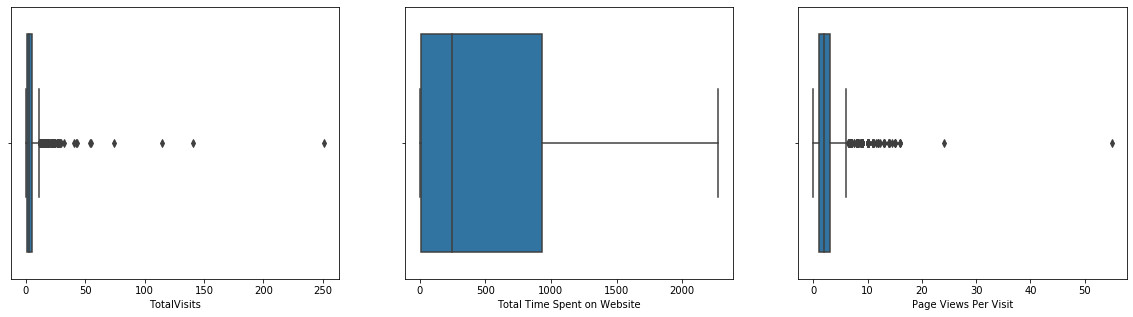

In [67]:
plt.figure(figsize = (20,5))
numerical_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(numerical_col):
    plt.subplot(1,3, i[0]+1)
    sns.boxplot(leads[i[1]])

'TotalVisits' and 'Page Views Per Visit' have ouliers in upper range

### Outlier treatment

In [68]:
# capping upper range outliers for TotalVisits and Page Views Per Visit

q4_TV = leads['TotalVisits'].quantile(0.99)
q4_PVPV = leads['Page Views Per Visit'].quantile(0.99)

leads['TotalVisits'][leads['TotalVisits']>= q4_TV] = q4_TV
leads['Page Views Per Visit'][leads['Page Views Per Visit']>= q4_PVPV] = q4_PVPV

In [69]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.327814,487.698268,2.329050
std,0.486714,3.228466,548.021466,1.971347
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,17.000000,2272.000000,9.000000


In [70]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,others,missing,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,missing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,others,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,others,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,others,missing,No,Modified


In [71]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [72]:
# Barplots for categorical variables to observe distribution amongst various categories

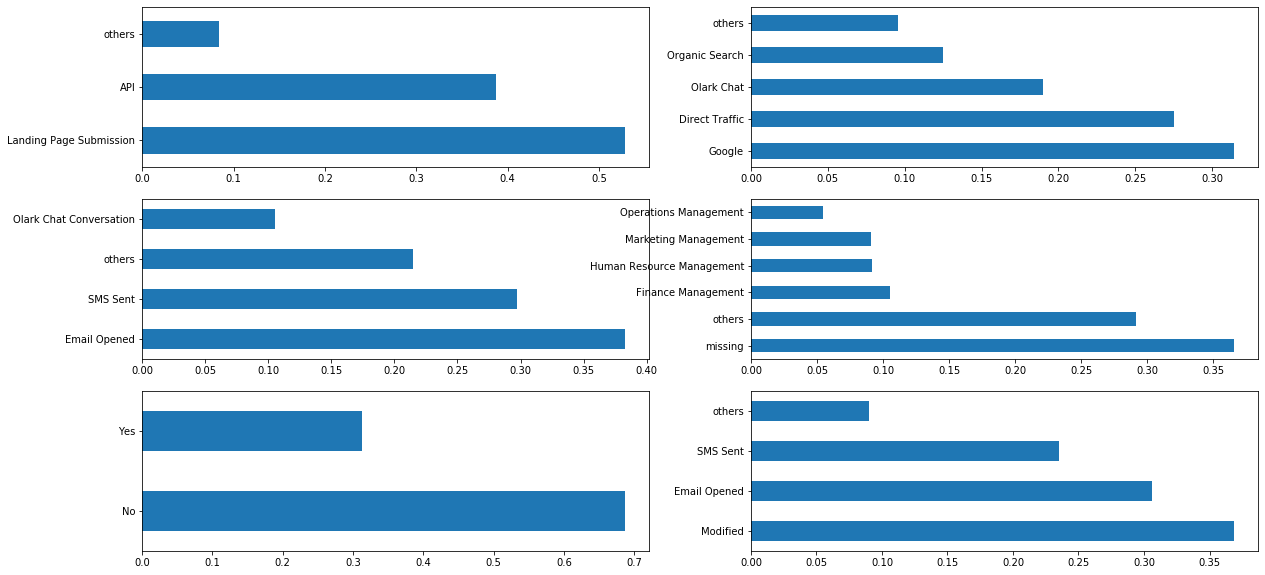

In [73]:
plt.figure(figsize = (20,10))
categorical_col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity']
for i in enumerate(categorical_col):
    plt.subplot(3,2, i[0]+1)
    leads[i[1]].value_counts(normalize=True).plot.barh()


### Bivariate Analysis

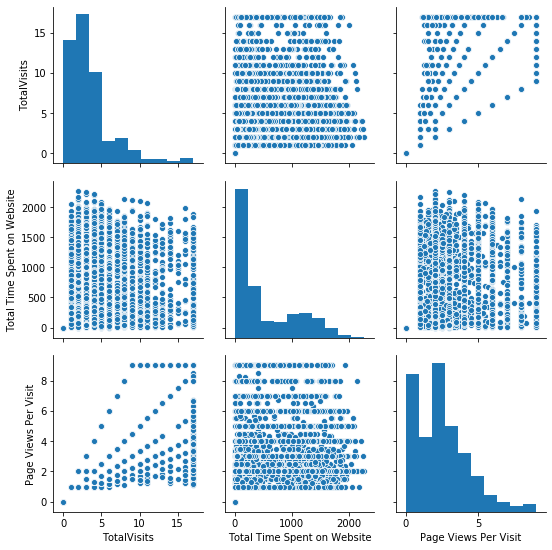

In [74]:
#Pairplot
sns.pairplot(data=leads,vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

In [75]:
corr=leads.drop(['Converted'],axis=1).corr()
corr

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.324556,0.706203
Total Time Spent on Website,0.324556,1.000000,0.336715
Page Views Per Visit,0.706203,0.336715,1.000000


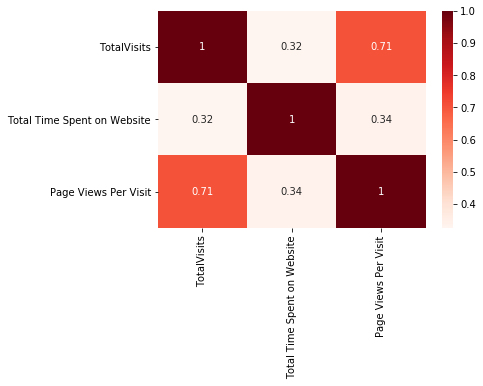

In [76]:
sns.heatmap(corr,annot=True,cmap="Reds")
plt.show()

TotalVisits and Page Views per Visit are highly correlated numerical variables

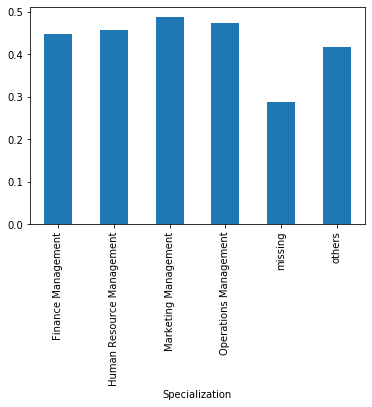

In [77]:
leads.groupby(['Specialization'])['Converted'].mean().plot.bar()
plt.show()

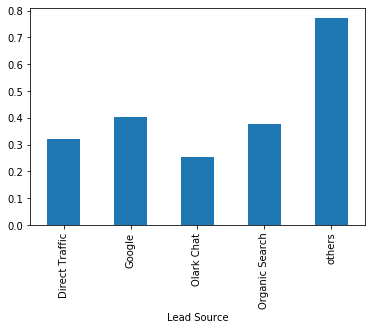

In [78]:
leads.groupby(['Lead Source'])['Converted'].mean().plot.bar()
plt.show()

### Step 4: Data Preparation

In [79]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,others,missing,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,missing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,others,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,others,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,others,missing,No,Modified


In [80]:
# converting binary variables (Yes/No) to 0/1

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [81]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,others,missing,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,missing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,others,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,others,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,others,missing,0,Modified


In [82]:
leads.shape

(9240, 11)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [83]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity']], drop_first=True)

In [84]:
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [85]:
leads.shape

(9240, 28)

In [86]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_others,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_missing,Specialization_others,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_others
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,others,missing,0,Modified,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,missing,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,others,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,others,0,Modified,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,others,missing,0,Modified,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


#### Dropping the repeated variables

In [87]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity'], 1)
leads.shape

(9240, 23)

In [88]:
# All variables are now numeric-

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   A free copy of Mastering The Interview    9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_others                        9240 non-null   uint8  
 8   Lead Source_Google                        9240 non-null   uint8  
 9   Lead Source_Olark Chat                    9240 non-null   uint8  
 10  Lead Source_Organic Search          

### Step 4: Test Train Split

In [89]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_others,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_missing,Specialization_others,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_others
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [90]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitting the data into train and test (70-30 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [92]:
# Scaling all variabls to make them comparable and easy to interpret

In [93]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_others,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_missing,Specialization_others,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_others
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8105,0.512365,1.365219,1.364995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [94]:
### Checking the Conversion Rate
convert = (sum(leads['Converted'])/len(leads['Converted'].index))*100
convert

38.53896103896104

###### We have 38.5 percent conversion rate 

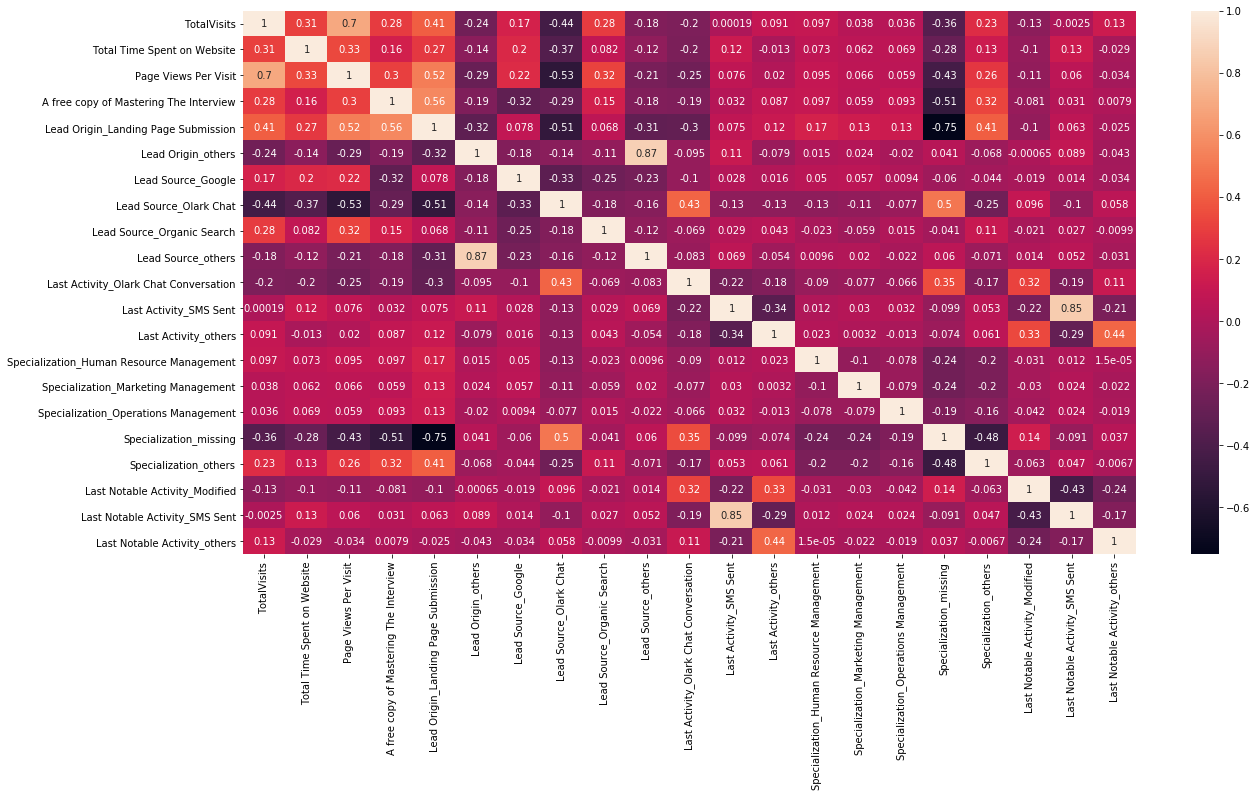

In [95]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(X_train.corr(),annot = True)
plt.show()

#### Generating top correlations between the variables

In [96]:
corr1=X_train.corr()
corr1 = corr1.where( np.triu(np.ones(corr1.shape),k=1).astype(bool))
corrdf1 = corr1.unstack().reset_index()
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace=True)
corrdf1['Correlation'] = round(corrdf1['Correlation'],2)
corrdf1['Correlation'] = corrdf1['Correlation'].abs()
corrdf1.sort_values(by ='Correlation', ascending=False,inplace=True)
corrdf1.head(10)

,VAR1,VAR2,Correlation
194,Lead Source_others,Lead Origin_others,0.87
410,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.85
340,Specialization_missing,Lead Origin_Landing Page Submission,0.75
42,Page Views Per Visit,TotalVisits,0.70
87,Lead Origin_Landing Page Submission,A free copy of Mastering The Interview,0.56
149,Lead Source_Olark Chat,Page Views Per Visit,0.53
86,Lead Origin_Landing Page Submission,Page Views Per Visit,0.52
151,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,0.51
339,Specialization_missing,A free copy of Mastering The Interview,0.51
343,Specialization_missing,Lead Source_Olark Chat,0.50


In [97]:
X_train.shape

(6468, 21)

#### Dropping highly correlated dummy variables (>=0.70)

In [98]:
X_train.drop(['Lead Source_others','Last Notable Activity_SMS Sent','Specialization_missing','Page Views Per Visit'],inplace=True,axis=1)

In [99]:
X_train.shape

(6468, 17)

### Step 6: Modelling

##### Model 1

In [100]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.0
Date:                Sun, 06 Sep 2020   Deviance:                       5848.1
Time:                        19:39:51   Pearson chi2:                 6.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1406      0.120     -9.513      0.000      -1.376      -0.906
TotalVisits                                  0.1612      0.040      4.045      0.000       0.083       0.239
Total Time Spent on Website                  1.0888      0.038     28.464      0.000       1.014       1.164
A free copy of Mastering The Interview      -0.1281      0.099     -1.294      0.196      -0.322       0.066
Lead Origin_Landing Page Submission         -0.4930      0.108     -4.558      0.000      -0.705      -0.281
Lead Origin_others                           3.5919      0.182     19.694      0.000       3.234       3.949
Lead Source_Google                           0.2663      0.101      2.638      0.008       0.068       0.464
Lead Source_Olark Chat                       1.2754      0.146      8.764      0.000       0.990       1.561
Lead Source_Organic Search                   0.0199      0.116      0.171      0.865      -0.208       0.248
Last Activity_Olark Chat Conversation       -0.9432      0.188     -5.028      0.000      -1.311      -0.576
Last Activity_SMS Sent                       1.1321      0.075     15.089      0.000       0.985       1.279
Last Activity_others                        -0.2995      0.140     -2.146      0.032      -0.573      -0.026
Specialization_Human Resource Management     0.5580      0.127      4.400      0.000       0.309       0.807
Specialization_Marketing Management          0.6257      0.124      5.029      0.000       0.382       0.870
Specialization_Operations Management         0.6933      0.150      4.623      0.000       0.399       0.987
Specialization_others                        0.5431      0.097      5.622      0.000       0.354       0.732
Last Notable Activity_Modified              -0.9058      0.097     -9.305      0.000      -1.097      -0.715
Last Notable Activity_others                -0.1488      0.175     -0.850      0.395      -0.492       0.194
============================================================================================================
"""

In [101]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.81
15,Last Notable Activity_Modified,3.28
10,Last Activity_others,3.27
2,A free copy of Mastering The Interview,2.66
14,Specialization_others,2.48
16,Last Notable Activity_others,2.29
8,Last Activity_Olark Chat Conversation,2.16
6,Lead Source_Olark Chat,1.92
5,Lead Source_Google,1.80
9,Last Activity_SMS Sent,1.71


Looking at the Model stats of the entire dataset and also verifying the p-values it is observed that:
- The VIF doesnt show values > 5 which means that we dont have multicollinear variables.
- The p-Values are to be inspected for values > 0.05 and removed, in which case we will remove some columns
- We could manually remove them and try with manual method or use RFE with about 15 features and continue our model building further. As we checked both RFE ad manual selection yields same results, so using RFE to model faster

### Step 7: Feature Selection Using RFE

In [102]:
logreg = LogisticRegression()

In [103]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_others', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_others', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_others', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_others', True, 1)]

In [106]:
col = X_train.columns[rfe.support_]

In [107]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Organic Search'], dtype='object')

##### Assessing the model with StatsModels

##### Model 2

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.9
Date:                Sun, 06 Sep 2020   Deviance:                       5849.8
Time:                        19:39:51   Pearson chi2:                 6.69e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1743      0.102    -11.539      0.000      -1.374      -0.975
TotalVisits                                  0.1602      0.039      4.128      0.000       0.084       0.236
Total Time Spent on Website                  1.0874      0.038     28.456      0.000       1.013       1.162
Lead Origin_Landing Page Submission         -0.5343      0.102     -5.220      0.000      -0.735      -0.334
Lead Origin_others                           3.6244      0.174     20.828      0.000       3.283       3.965
Lead Source_Google                           0.3211      0.078      4.136      0.000       0.169       0.473
Lead Source_Olark Chat                       1.3049      0.135      9.672      0.000       1.040       1.569
Last Activity_Olark Chat Conversation       -0.9451      0.188     -5.036      0.000      -1.313      -0.577
Last Activity_SMS Sent                       1.1321      0.075     15.109      0.000       0.985       1.279
Last Activity_others                        -0.2998      0.140     -2.149      0.032      -0.573      -0.026
Specialization_Human Resource Management     0.5428      0.126      4.300      0.000       0.295       0.790
Specialization_Marketing Management          0.6140      0.124      4.950      0.000       0.371       0.857
Specialization_Operations Management         0.6800      0.150      4.545      0.000       0.387       0.973
Specialization_others                        0.5267      0.096      5.509      0.000       0.339       0.714
Last Notable Activity_Modified              -0.9039      0.097     -9.286      0.000      -1.095      -0.713
Last Notable Activity_others                -0.1494      0.175     -0.854      0.393      -0.492       0.193
============================================================================================================
"""

In [109]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.405653
6795    0.158501
3516    0.368385
8105    0.862711
3934    0.130124
4844    0.881731
3297    0.142454
8071    0.813445
987     0.137788
7423    0.917571
dtype: float64

In [110]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.40565256, 0.15850106, 0.36838545, 0.86271116, 0.13012355,
       0.88173053, 0.14245421, 0.81344485, 0.13778807, 0.91757096])

##### Creating a dataframe with the actual convert flag and the predicted probabilities

In [111]:
y_train_pred_final = pd.DataFrame({'convert':y_train.values, 'convert_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,convert,convert_Prob,ID
0,0,0.405653,1871
1,0,0.158501,6795
2,0,0.368385,3516
3,0,0.862711,8105
4,0,0.130124,3934


##### Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0

In [112]:
y_train_pred_final['predicted'] = y_train_pred_final.convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,convert,convert_Prob,ID,predicted
0,0,0.405653,1871,0
1,0,0.158501,6795,0
2,0,0.368385,3516,0
3,0,0.862711,8105,1
4,0,0.130124,3934,0


In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.convert, y_train_pred_final.predicted )
print(confusion)

[[3493  509]
 [ 799 1667]]


In [114]:
# Predicted     not_churn    churn
# Actual
# not_churn        3493      509
# churn            799       1667 

In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.convert, y_train_pred_final.predicted))

0.7977736549165121


#### Checking VIFs

In [116]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.78
13,Last Notable Activity_Modified,3.26
8,Last Activity_others,3.24
12,Specialization_others,2.39
14,Last Notable Activity_others,2.29
6,Last Activity_Olark Chat Conversation,2.15
5,Lead Source_Olark Chat,1.92
7,Last Activity_SMS Sent,1.64
0,TotalVisits,1.50
9,Specialization_Human Resource Management,1.43


It is noticed that p-values is high for 'Last Notable Activity_others' and VIF is okay (<5). 
Lets try to remove see impact on accuracy of model

In [117]:
col = col.drop('Last Notable Activity_others', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_others', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_others',
       'Last Notable Activity_Modified'],
      dtype='object')

##### Model 3

In [118]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2925.3
Date:                Sun, 06 Sep 2020   Deviance:                       5850.6
Time:                        19:39:52   Pearson chi2:                 6.70e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1796      0.102    -11.612      0.000      -1.379      -0.981
TotalVisits                                  0.1553      0.038      4.046      0.000       0.080       0.230
Total Time Spent on Website                  1.0872      0.038     28.446      0.000       1.012       1.162
Lead Origin_Landing Page Submission         -0.5335      0.102     -5.212      0.000      -0.734      -0.333
Lead Origin_others                           3.6091      0.173     20.867      0.000       3.270       3.948
Lead Source_Google                           0.3199      0.078      4.121      0.000       0.168       0.472
Lead Source_Olark Chat                       1.2968      0.135      9.638      0.000       1.033       1.561
Last Activity_Olark Chat Conversation       -1.0140      0.170     -5.976      0.000      -1.347      -0.681
Last Activity_SMS Sent                       1.1288      0.075     15.100      0.000       0.982       1.275
Last Activity_others                        -0.3838      0.099     -3.867      0.000      -0.578      -0.189
Specialization_Human Resource Management     0.5441      0.126      4.310      0.000       0.297       0.792
Specialization_Marketing Management          0.6168      0.124      4.975      0.000       0.374       0.860
Specialization_Operations Management         0.6814      0.150      4.556      0.000       0.388       0.974
Specialization_others                        0.5286      0.096      5.531      0.000       0.341       0.716
Last Notable Activity_Modified              -0.8579      0.081    -10.623      0.000      -1.016      -0.700
============================================================================================================
"""

In [119]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [120]:
y_train_pred[:10]

array([0.40436368, 0.15775243, 0.36472274, 0.86150817, 0.13446867,
       0.88094399, 0.14147168, 0.80476195, 0.13310367, 0.91681954])

In [121]:
y_train_pred_final['convert_Prob'] = y_train_pred

In [122]:
# Creating new column 'predicted' with 1 if convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,convert,convert_Prob,ID,predicted
0,0,0.404364,1871,0
1,0,0.157752,6795,0
2,0,0.364723,3516,0
3,0,0.861508,8105,1
4,0,0.134469,3934,0


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.convert, y_train_pred_final.predicted))

0.7974644403215831


So overall the accuracy is practically the same and now p-value is 0 for all variables.

##### Let's check the VIFs again

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.78
12,Specialization_others,2.39
13,Last Notable Activity_Modified,2.11
5,Lead Source_Olark Chat,1.85
8,Last Activity_others,1.76
6,Last Activity_Olark Chat Conversation,1.71
7,Last Activity_SMS Sent,1.64
0,TotalVisits,1.46
9,Specialization_Human Resource Management,1.43
4,Lead Source_Google,1.42


All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [125]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.convert, y_train_pred_final.predicted )
confusion

array([[3492,  510],
       [ 800, 1666]], dtype=int64)

In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.convert, y_train_pred_final.predicted)

0.7974644403215831

In [127]:
# Lets check by removing highest VIF to see impact on accuracy. 
# If it degrades, we will select model 3 else we will go on building model 4

In [128]:
# For model 4, accuracy is degraded, p-value has increased a little than previous model. VIF is fine. So, removed model 4.

## We can proceed with making predictions using Model 3 only
## Model 3 is the best model out of 3 models
1. Accuracy is high (approx 80%)
2. p-value is 0 for all variables
3. VIF is within range (<5)
4. Total variables in the model are less than 15

## Other important metrics 

In [129]:
confusion

array([[3492,  510],
       [ 800, 1666]], dtype=int64)

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.67558799675588

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8725637181409296

In [133]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12743628185907047


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.765625


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8136067101584343


In [136]:
#Since sensitivity is 67.5%, we need to ptimize the model to obtan higher sensitivity

### Step : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.convert, y_train_pred_final.convert_Prob, drop_intermediate = False )

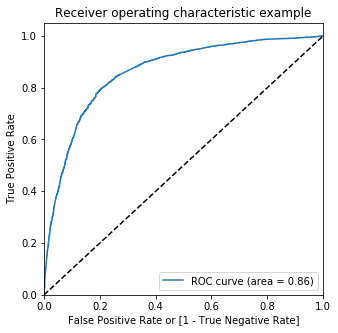

In [139]:
draw_roc(y_train_pred_final.convert, y_train_pred_final.convert_Prob)

In [140]:
# The curve follows the left-hand border and then the top border of the ROC space, this demonstrates that the test is accurate.

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [141]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,convert,convert_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.404364,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.157752,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.364723,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.861508,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.134469,3934,0,1,1,0,0,0,0,0,0,0,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.569264  0.970397  0.322089
0.2   0.2  0.713049  0.916058  0.587956
0.3   0.3  0.781385  0.834550  0.748626
0.4   0.4  0.796846  0.751419  0.824838
0.5   0.5  0.797464  0.675588  0.872564
0.6   0.6  0.779530  0.571371  0.907796
0.7   0.7  0.757267  0.467153  0.936032
0.8   0.8  0.724644  0.334550  0.965017
0.9   0.9  0.675170  0.167072  0.988256


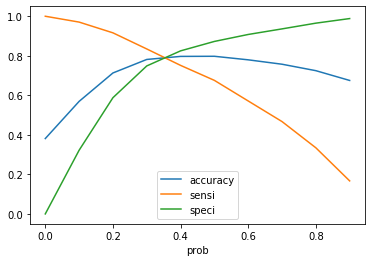

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [144]:
y_train_pred_final['final_predicted'] = y_train_pred_final.convert_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,convert,convert_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.404364,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.157752,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.364723,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.861508,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.134469,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.convert, y_train_pred_final.final_predicted)

0.7906617192331478

In [146]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.convert, y_train_pred_final.final_predicted )
confusion2

array([[3117,  885],
       [ 469, 1997]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8098134630981346

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.7788605697151424

In [150]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22113943028485758


In [151]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6929215822345594


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8692136084774121


## Precision and Recall

In [153]:
#Looking at the confusion matrix again

In [154]:
confusion

array([[3492,  510],
       [ 800, 1666]], dtype=int64)

##### Precision
TP / TP + FP

In [155]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.765625

##### Recall
TP / TP + FN

In [156]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.67558799675588

In [157]:
precision_score(y_train_pred_final.convert, y_train_pred_final.predicted)

0.765625

In [158]:
recall_score(y_train_pred_final.convert, y_train_pred_final.predicted)

0.67558799675588

In [159]:
# Precision and recall using optimal probability of 0.33

In [160]:
confusion2

array([[3117,  885],
       [ 469, 1997]], dtype=int64)

##### Precision with 0.33 prob cutoff

In [161]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6929215822345594

##### Recall with 0.33 prob cutoff

In [162]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8098134630981346

In [163]:
# Recall is nothing but sensitivity. It is >80 percent, which shows model is good.

### Precision and recall tradeoff

In [164]:
y_train_pred_final.convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: convert, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.convert, y_train_pred_final.convert_Prob)

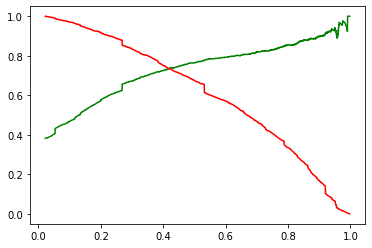

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [167]:
# For optimizing precision and recall, we can use interection of above curve.
# It seems above curve will give cut-of of 0.4
# However, we have already build the model using sensitivity and specificity, So we can ignore building again using Precision-Recall metric.

### Step 10: Making predictions on the test set

In [168]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [169]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_others,Last Notable Activity_Modified
4269,1.433341,0.964504,0,0,0,0,0,1,0,0,0,0,0,0
2376,-1.022595,-0.885371,0,1,0,0,0,1,0,0,0,0,0,0
7766,0.512365,-0.777416,0,0,1,0,0,0,1,0,0,0,1,0
9199,-1.022595,-0.885371,0,0,0,1,1,0,0,0,0,0,0,1
4359,-1.022595,-0.885371,0,1,0,0,0,0,0,0,1,0,0,0


In [170]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [171]:
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

4269    0.772117
2376    0.919603
7766    0.185337
9199    0.053352
4359    0.872690
9186    0.656155
1631    0.435073
8963    0.213336
8007    0.050736
5324    0.406038
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [174]:
# Let's see the head
y_pred_1.head()

,0
4269,0.772117
2376,0.919603
7766,0.185337
9199,0.053352
4359,0.872690


In [175]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [176]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [177]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [178]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [179]:
y_pred_final.head()

,Converted,ID,0
0,1,4269,0.772117
1,1,2376,0.919603
2,1,7766,0.185337
3,0,9199,0.053352
4,1,4359,0.872690


In [180]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'convert_Prob'})
y_pred_final.head()

,Converted,ID,convert_Prob
0,1,4269,0.772117
1,1,2376,0.919603
2,1,7766,0.185337
3,0,9199,0.053352
4,1,4359,0.872690


In [181]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','convert_Prob'], axis=1)

In [182]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,convert_Prob
0,4269,1,0.772117
1,2376,1,0.919603
2,7766,1,0.185337
3,9199,0,0.053352
4,4359,1,0.872690


##### Creating new column a 'Lead_Score'

In [183]:
y_pred_final['Lead_Score']=y_pred_final['convert_Prob'] * 100

In [184]:
y_pred_final.head()

,ID,Converted,convert_Prob,Lead_Score
0,4269,1,0.772117,77.211728
1,2376,1,0.919603,91.960319
2,7766,1,0.185337,18.533658
3,9199,0,0.053352,5.335242
4,4359,1,0.872690,87.269036


In [185]:
y_pred_final['final_predicted'] = y_pred_final.convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [186]:
y_pred_final.head()

,ID,Converted,convert_Prob,Lead_Score,final_predicted
0,4269,1,0.772117,77.211728,1
1,2376,1,0.919603,91.960319,1
2,7766,1,0.185337,18.533658,0
3,9199,0,0.053352,5.335242,0
4,4359,1,0.872690,87.269036,1


In [187]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7994227994227994

In [188]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1338,  339],
       [ 217,  878]], dtype=int64)

In [189]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8018264840182648

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.7978533094812165

1. Test set shows similar observations as train set.
2. Sensitivity, Specificity, Accuracy are all approx 80%.

# Lead Score

In [192]:
y_pred_final[['Lead_Score','final_predicted']]

,Lead_Score,final_predicted
0,77.211728,1
1,91.960319,1
2,18.533658,0
3,5.335242,0
4,87.269036,1
...,...,...
2767,19.815656,0
2768,94.029858,1
2769,26.813463,0
2770,44.869077,1


In [193]:
y_pred_final['Lead_Score'].describe()

count    2772.000000
mean       37.939922
std        29.660101
min         1.843615
25%        11.749320
50%        26.838074
75%        62.520557
max        99.484984
Name: Lead_Score, dtype: float64

## Conclusions:

1. Most promising leads can be identified on the basis of lead score (1-100) generated above.
2. Higher the lead score, more is the likelihood of conversion.
3. Top 3 Variable that affects the most in lead conversion are listed below in priority higher to lower:
   - Lead Origin_others 
   
   - Lead Source_Olark Chat 
   
   - LastActivity_SMS Sent